In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from sklearn.metrics import  roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split ,cross_val_score, StratifiedKFold

# 1- loading my cleaned table

In [25]:
df = pd.read_csv('/Users/asalzooashkiany/Documents/LHL_final_project/data/cleaned_csv.csv')

In [26]:
df.head()

,HadHeartAttack,HadAngina,PhysicalHealthDays,PhysicalActivities,HadStroke,HadDiabetes,SmokerStatus,GeneralHealth,SleepHours,HadDepressiveDisorder,HadCOPD,HadKidneyDisease,HadArthritis,LastCheckupTime,Sex,AgeCategory,BMI,RaceEthnicityCategory
0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1,3.0,26.354172,"White only, Non-Hispanic"
1,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1,3.0,26.570000,"White only, Non-Hispanic"
2,0.0,0.0,2.0,1.0,0.0,0.6,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1,1.0,25.610000,"White only, Non-Hispanic"
3,0.0,0.0,0.0,1.0,0.0,0.2,3.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,1,1.2,23.300000,"White only, Non-Hispanic"
4,0.0,0.0,2.0,1.0,0.0,0.6,0.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,1,1.0,21.770000,"White only, Non-Hispanic"


# 2-Before training a models i need to see and know how to handle my imbalanced target variable

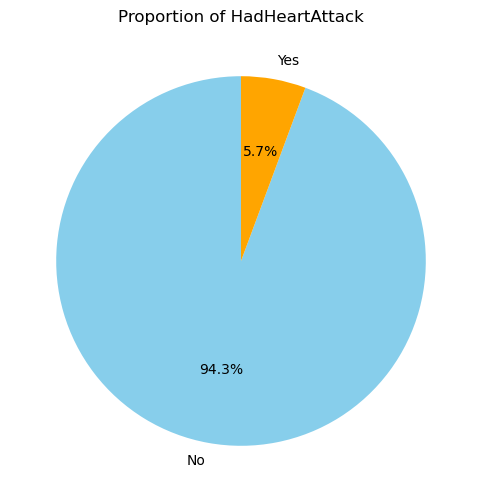

In [27]:
attack_counts = df['HadHeartAttack'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.pie(attack_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Proportion of HadHeartAttack')
plt.show()


In [28]:
print("Counts of each category in 'HadHeartAttack':")
print(df['HadHeartAttack'].value_counts())

Counts of each category in 'HadHeartAttack':
HadHeartAttack
0.0    415353
1.0     24940
Name: count, dtype: int64


# 3- Prepare the Data and Spliting it into Training and Testing Sets
### since i have a larg amount of data i choosed mt test_size to be **30%**

In [29]:
X = df.drop('HadHeartAttack', axis=1)  # Features (independent variables)
y = df['HadHeartAttack']  # Target variable (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)

In [30]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (308205, 17)
Testing set size: (132088, 17)


In [31]:
df.describe()

,HadHeartAttack,HadAngina,PhysicalHealthDays,PhysicalActivities,HadStroke,HadDiabetes,SmokerStatus,GeneralHealth,SleepHours,HadDepressiveDisorder,HadCOPD,HadKidneyDisease,HadArthritis,LastCheckupTime,Sex,AgeCategory,BMI
count,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000,440293.00000,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000
mean,0.056644,0.060674,4.210701,0.761391,0.042800,0.401004,0.561572,1.560547,7.023055,0.206181,0.08012,0.045666,0.341526,0.334654,0.530740,1.312551,28.516692
std,0.231162,0.237318,8.573042,0.426234,0.202159,0.221183,0.765880,1.048721,1.486445,0.403702,0.27066,0.208186,0.473133,0.768956,0.499055,0.916600,6.190932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,12.020000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.000000,1.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,24.410000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.400000,0.000000,2.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,27.908853
75%,0.000000,0.000000,3.000000,1.000000,0.000000,0.600000,1.000000,2.000000,8.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,2.000000,31.010000
max,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,3.000000,4.000000,24.000000,1.000000,1.00000,1.000000,1.000000,3.000000,1.000000,3.000000,99.640000


### seeing how significant each feature is 

## 4- **one-hot encoding**  `RaceEthnicityCategory`

In [32]:
categorical_features = ['RaceEthnicityCategory']  # Add any other categorical columns as needed
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # This keeps all other columns untouched
)


X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

In [33]:
X_train_encoded

array([[ 0.  ,  0.  ,  0.  , ...,  1.  ,  1.  , 23.49],
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  1.  , 32.61],
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  2.  , 25.1 ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  1.  ,  3.  , 20.05],
       [ 0.  ,  0.  ,  0.  , ...,  1.  ,  2.  , 28.34],
       [ 0.  ,  0.  ,  0.  , ...,  1.  ,  1.  , 18.79]])

## 5- scaling the data 

In [34]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fiting the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Applying the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test_encoded)

In [35]:
encoded_feature_names = column_transformer.get_feature_names_out()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=encoded_feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=encoded_feature_names)

In [36]:
X_train_scaled.head()

,"cat__RaceEthnicityCategory_Black only, Non-Hispanic",cat__RaceEthnicityCategory_Hispanic,"cat__RaceEthnicityCategory_Multiracial, Non-Hispanic","cat__RaceEthnicityCategory_Other race only, Non-Hispanic","cat__RaceEthnicityCategory_White only, Non-Hispanic",remainder__HadAngina,remainder__PhysicalHealthDays,remainder__PhysicalActivities,remainder__HadStroke,remainder__HadDiabetes,...,remainder__GeneralHealth,remainder__SleepHours,remainder__HadDepressiveDisorder,remainder__HadCOPD,remainder__HadKidneyDisease,remainder__HadArthritis,remainder__LastCheckupTime,remainder__Sex,remainder__AgeCategory,remainder__BMI
0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.6,...,0.25,0.217391,0.0,0.0,0.0,0.0,0.666667,1.0,0.333333,0.130906
1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0,0.4,...,0.50,0.304348,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.234992
2,1.0,0.0,0.0,0.0,0.0,0.0,0.133333,1.0,0.0,0.2,...,0.25,0.391304,1.0,0.0,0.0,1.0,0.333333,0.0,0.666667,0.149281
3,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.6,...,0.25,0.260870,0.0,0.0,0.0,0.0,0.666667,1.0,0.333333,0.128738
4,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.4,...,0.25,0.304348,0.0,0.0,0.0,0.0,1.000000,1.0,0.333333,0.157841


<Axes: >

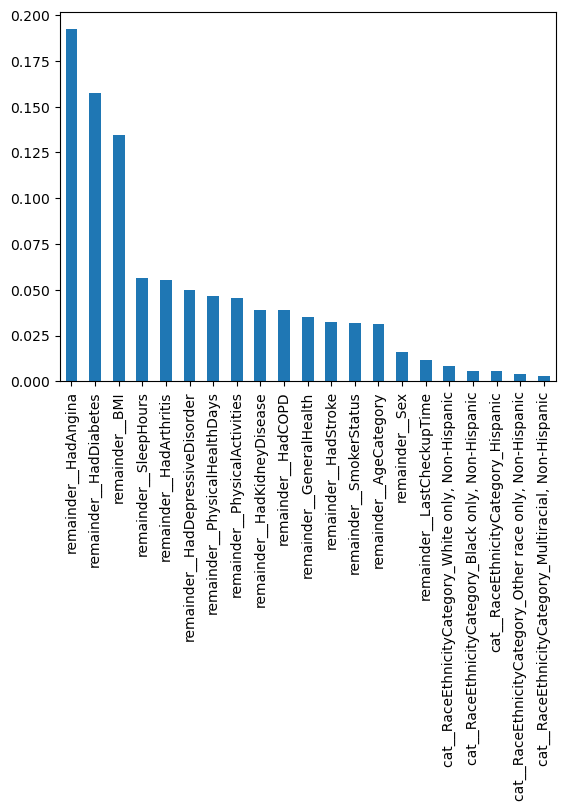

In [37]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
importances = model.feature_importances_

# To visualize feature importances
pd.Series(importances, index=X_train_scaled.columns).sort_values(ascending=False).plot(kind='bar')

## 5-handleding my imbalanced data with **SMOTE** generates synthetic samples for the minority class

**Synthetic Samples:** SMOTE generates synthetic samples rather than simply duplicating minority class instances. It does this by selecting examples that are close in the feature space, drawing a line between the examples in the feature space, and creating a new sample at a point along that line. This approach helps in adding more generalization than simple duplication.


In [38]:
# Initialize the SMOTE sampler
smote = SMOTE(random_state=42)

# Resample the training data
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

# Checking the new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_smote))


Before SMOTE: Counter({0.0: 290747, 1.0: 17458})
After SMOTE: Counter({0.0: 290747, 1.0: 290747})


<Axes: >

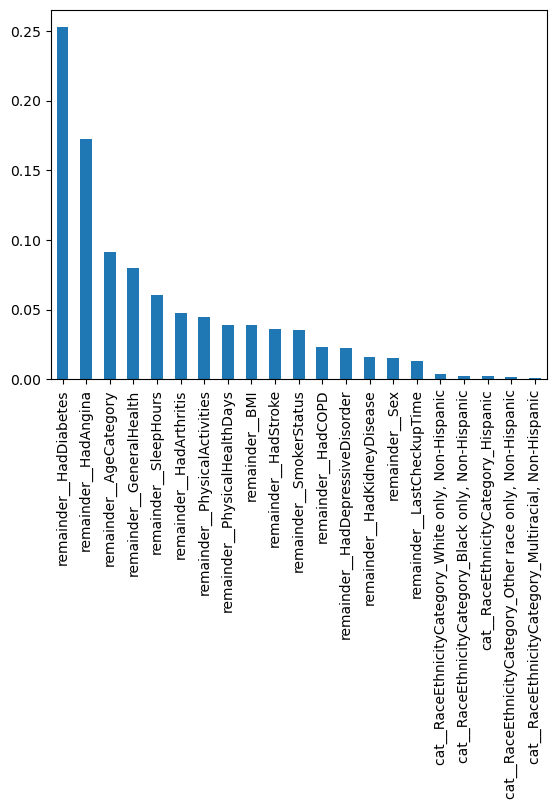

In [39]:
model = RandomForestClassifier(random_state=42)

model.fit(X_smote, y_smote)

# Get the feature importances
importances = model.feature_importances_

pd.Series(importances, index=X_smote.columns).sort_values(ascending=False).plot(kind='bar')

In [40]:
model = RandomForestClassifier(n_estimators=50, random_state=42)

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation
cv_scores = cross_val_score(model, X_smote, y_smote, cv=cv, scoring='accuracy')

# Printing the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.98646592 0.98589842 0.98611338 0.98548569 0.9858811 ]
Mean CV accuracy: 0.9859689006459188


In [42]:
model.fit(X_smote, y_smote)

RandomForestClassifier(n_estimators=50, random_state=42)

In [43]:
y_pred = model.predict(X_test_scaled)

In [44]:
X_test_scaled

,"cat__RaceEthnicityCategory_Black only, Non-Hispanic",cat__RaceEthnicityCategory_Hispanic,"cat__RaceEthnicityCategory_Multiracial, Non-Hispanic","cat__RaceEthnicityCategory_Other race only, Non-Hispanic","cat__RaceEthnicityCategory_White only, Non-Hispanic",remainder__HadAngina,remainder__PhysicalHealthDays,remainder__PhysicalActivities,remainder__HadStroke,remainder__HadDiabetes,...,remainder__GeneralHealth,remainder__SleepHours,remainder__HadDepressiveDisorder,remainder__HadCOPD,remainder__HadKidneyDisease,remainder__HadArthritis,remainder__LastCheckupTime,remainder__Sex,remainder__AgeCategory,remainder__BMI
0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.4,...,0.75,0.391304,0.0,0.0,0.0,0.0,0.333333,1.0,0.666667,0.215476
1,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.0,0.0,0.2,...,0.75,0.217391,1.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.201126
2,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.0,0.0,0.2,...,0.75,0.304348,1.0,0.0,0.0,1.0,0.000000,1.0,0.333333,0.113330
3,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.2,...,0.25,0.217391,0.0,0.0,0.0,1.0,0.000000,1.0,0.000000,0.181338
4,0.0,0.0,0.0,0.0,1.0,0.2,0.333333,1.0,1.0,0.2,...,0.50,0.347826,1.0,0.0,0.0,1.0,0.000000,1.0,1.000000,0.194704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132083,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.4,...,0.50,0.260870,0.0,0.0,0.0,0.0,0.000000,1.0,0.333333,0.254622
132084,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.2,...,0.00,0.260870,0.0,0.0,0.0,1.0,0.000000,0.0,0.666667,0.172335
132085,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.6,...,0.25,0.217391,0.0,0.0,0.0,0.0,1.000000,0.0,0.333333,0.165716
132086,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.4,...,0.50,0.304348,0.0,0.0,0.0,0.0,0.333333,0.0,1.000000,0.094955


In [45]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    124606
         1.0       0.74      0.75      0.74      7482

    accuracy                           0.97    132088
   macro avg       0.86      0.86      0.86    132088
weighted avg       0.97      0.97      0.97    132088

Confusion Matrix:
 [[122609   1997]
 [  1907   5575]]


random_state=42: Ensures reproducibility of your results by initializing the internal random number generator in a fixed state.

use_label_encoder=False: Starting with XGBoost version 1.3.0, it's recommended to set this parameter to False to avoid warnings, as the default label encoder is deprecated.

eval_metric='logloss': Specifies the evaluation metric to be used during training. For binary classification problems, 'logloss' (logarithmic loss) is commonly used. This metric helps to optimize the model during training by minimizing the loss.

In [46]:
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [47]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_smote, y_smote, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.98169374 0.98269117 0.98275995 0.98142718 0.98150441]
Mean CV accuracy: 0.9820152907667496


In [48]:
# Fit the model
model.fit(X_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [49]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    124606
         1.0       0.74      0.75      0.74      7482

    accuracy                           0.97    132088
   macro avg       0.86      0.86      0.86    132088
weighted avg       0.97      0.97      0.97    132088

Confusion Matrix:
 [[122609   1997]
 [  1907   5575]]


## recision, Recall, and F1-Score:

### Class 0.0 (Majority Class)
**Precision:` 0.99`-**  The model has a high precision for class 0.0, meaning it rarely mislabels other classes as class 0.0.

**Recall: `0.98` -**  It correctly identifies 98% of all actual class 0.0 instances.

**F1-Score: `0.99`-** The F1-score is near perfect, indicating a strong balance between precision and recall for the majority class.

### Class 1.0 (Minority Class)
**Precision: `0.76` -** This is relatively lower than class 0.0 but still quite good, indicating that when the model predicts an instance as class 1.0, it is correct about 76% of the time.

**Recall: `0.82` -** The model correctly identifies 82% of actual class 1.0 instances, which is quite good, especially for a minority class in an imbalanced dataset.

**F1-Score: `0.79` -** This is a decent score for the minority class, considering the imbalance. It shows a good balance between recall and precision.

In [50]:
model = XGBClassifier(
    max_depth=11,
    learning_rate=0.2,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [51]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_smote, y_smote, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.98668948 0.98619937 0.98701623 0.98619937 0.98644861]
Mean CV accuracy: 0.9865106087732588


In [52]:
model.fit(X_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [53]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    124606
         1.0       0.74      0.75      0.74      7482

    accuracy                           0.97    132088
   macro avg       0.86      0.86      0.86    132088
weighted avg       0.97      0.97      0.97    132088

Confusion Matrix:
 [[122609   1997]
 [  1907   5575]]


In [54]:
y_prob= model.predict_proba(X_test_scaled)
y_prob 

array([[9.9966693e-01, 3.3307230e-04],
       [9.9095178e-01, 9.0482412e-03],
       [9.9870396e-01, 1.2960180e-03],
       ...,
       [9.9993896e-01, 6.1062223e-05],
       [9.9906975e-01, 9.3027088e-04],
       [9.9993247e-01, 6.7523637e-05]], dtype=float32)

In [55]:
y_pred_cons = y_prob[:, 1]>0.3
print(classification_report(y_test, y_pred_cons))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cons))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    124606
         1.0       0.71      0.86      0.78      7482

    accuracy                           0.97    132088
   macro avg       0.85      0.92      0.88    132088
weighted avg       0.98      0.97      0.97    132088

Confusion Matrix:
 [[121971   2635]
 [  1044   6438]]


In [56]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)  # Get probability estimates

# Defaulting classification report and confusion matrix
print("Default Threshold 0.5 Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Using a custom threshold of 0.3 to determine class predictions
y_pred_cons = y_prob[:, 1] > 0.3  # This is a boolean array where True indicates class 1

# Classification report and confusion matrix for custom threshold
print("Custom Threshold 0.3 Classification Report:")
print(classification_report(y_test, y_pred_cons))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cons))


Default Threshold 0.5 Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    124606
         1.0       0.78      0.79      0.79      7482

    accuracy                           0.98    132088
   macro avg       0.89      0.89      0.89    132088
weighted avg       0.98      0.98      0.98    132088

Confusion Matrix:
 [[122978   1628]
 [  1552   5930]]
Custom Threshold 0.3 Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    124606
         1.0       0.71      0.86      0.78      7482

    accuracy                           0.97    132088
   macro avg       0.85      0.92      0.88    132088
weighted avg       0.98      0.97      0.97    132088

Confusion Matrix:
 [[121971   2635]
 [  1044   6438]]


AUC: 0.9874606513271665


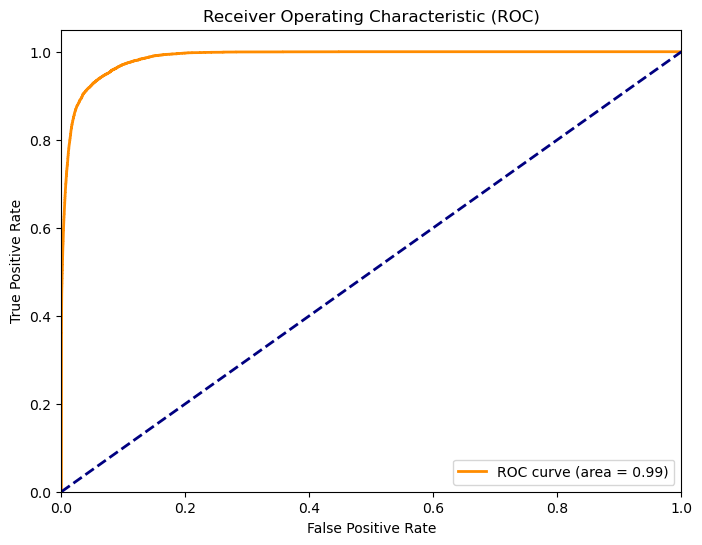

In [57]:

model.fit(X_smote, y_smote)

# Obtaining probability scores for the positive class
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Calculateing ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculating AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_scores)
print("AUC:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Youden's J Statistic:
### Youden's J statistic is a `single number` that is calculated from a `point on the ROC curve`. It is defined as `J = sensitivity + specificity - 1`, which simplifies to` J = true positive rate - false positive rate`.
### The statistic provides a method to **identify the optimal threshold:** the `point on the ROC curve that maximizes the J statistic is considered the best trade-off` between `true positives` and `false positives` for a given classifier. It effectively maximizes the classifier's performance in terms of both sensitivity and specificity.

In [58]:
import numpy as np
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculating the Youden's J statistic to find the optimal threshold
J = tpr - fpr
idx = np.argmax(J)
optimal_threshold = thresholds[idx]

print("Optimal threshold:", optimal_threshold)

# Useing the optimal threshold to adjust your predictions
y_pred_optimal = (y_scores >= optimal_threshold).astype(int)

Optimal threshold: 0.07548561


### The `recall` **(also known as sensitivity or true positive rate)** measures the model's ability to identify all actual positives.

#### Default Threshold (0.5): Recall = 0.81
#### Custom Threshold (0.3): Recall = 0.87
#### Optimal Threshold (~0.096): Recall = 0.94

### the optimal threshold results in a **lower `precision`** for class **1**, which means you will have more `false positives`.

In [59]:
model = XGBClassifier(
    max_depth=11,
    learning_rate=0.2,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [60]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_smote, y_smote, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.98668948 0.98619937 0.98701623 0.98619937 0.98644861]
Mean CV accuracy: 0.9865106087732588


In [63]:
model.fit(X_smote, y_smote)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


optimal_threshold = 0.07548561  # The optimal threshold identified from the ROC analysis
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))
print("Confusion Matrix with Optimal Threshold:\n", confusion_matrix(y_test, y_pred_optimal))

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    124606
         1.0       0.48      0.94      0.63      7482

    accuracy                           0.94    132088
   macro avg       0.74      0.94      0.80    132088
weighted avg       0.97      0.94      0.95    132088

Confusion Matrix with Optimal Threshold:
 [[116909   7697]
 [   447   7035]]


## **meaning of different threshold:**

### **Default Threshold (0.5):**
#### By default, many classification algorithms use a threshold of `0.5`. This means that if the predicted probability of an instance belonging to the positive class is 0.5 or greater, the instance is classified as positive; otherwise, it is classified as negative.
#### This threshold is commonly used because it **balances sensitivity (true positive rate) and specificity (true negative rate)** when the costs of false positives and false negatives are equal.

### **Custom Threshold:**
#### A custom threshold is any threshold value other than 0.5. Choosing a `custom threshold` allows you to adjust the trade-off between false positives and false negatives based on the specific requirements of your problem.
#### `Lowering the threshold` (e.g., to 0.3) `increases the sensitivity` of the model, making it **more likely** to classify instances as positive. This reduces the number of false negatives but increases the number of false positives.
#### Conversely, `raising the threshold` (e.g., to 0.7) `decreases the sensitivity` of the model, making it **less likely** to classify **instances as positive**. This reduces the number of false positives but increases the number of false negatives.

### **Optimal Threshold:**
#### The optimal threshold is the threshold value that `maximizes a chosen metric` or meets specific requirements for your problem. This could be done by analyzing the trade-offs between false positives and false negatives, considering the costs associated with each type of error, or using techniques like the `ROC curve` or `Youden's J statistic`.
#### The optimal threshold is context-dependent and may vary based on the application and the relative **importance of false positives and false negatives**.

## 7- Saving my model and the x and y data 

In [64]:
import pickle

# the trained model
model.fit(X_smote, y_smote)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

optimal_threshold = 0.062
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))
print("Confusion Matrix with Optimal Threshold:\n", confusion_matrix(y_test, y_pred_optimal))

# Defining the path where you want to save the files
base_path = "/Users/asalzooashkiany/Documents/LHL_final_project/Model_&_featur and target variable"

# Serialize and save the model
with open(f"{base_path}/model.pkl", "wb") as file:
    pickle.dump(model, file)


datasets = {
    'X_test': X_test,
    'y_test': y_test,
    'X_smote': X_smote,
    'y_smote': y_smote,
    'X_train': X_train,
    'y_train': y_train,
    'X_train_scaled': X_train_scaled,
    'X_test_scaled': X_test_scaled
}

for name, data in datasets.items():
    with open(f"{base_path}/{name}.pkl", "wb") as file:
        pickle.dump(data, file)


Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    124606
         1.0       0.44      0.95      0.61      7482

    accuracy                           0.93    132088
   macro avg       0.72      0.94      0.78    132088
weighted avg       0.97      0.93      0.94    132088

Confusion Matrix with Optimal Threshold:
 [[115744   8862]
 [   385   7097]]
